In [1]:
import pandas as pd
#import codecademylib3
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# ASSOCIATIONS: QUANTITATIVE AND CATEGORICAL VARIABLES
# Introduction
# 7 min
# Examining the relationship between variables can give us key insight into our data. In this lesson, we will cover ways of assessing the association between a quantitative variable and a categorical variable.

# In the next few exercises, we’ll explore a dataset that contains the following information about students at two portuguese schools:

# school: the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
# address: the location of the student’s home ('U' for urban and 'R' for rural)
# absences: the number of times the student was absent during the school year
# Mjob: the student’s mother’s job industry
# Fjob: the student’s father’s job industry
# G3: the student’s score on a math assessment, ranging from 0 to 20
# Suppose we want to know: Is a student’s score (G3) associated with their school (school)? If so, then knowing what school a student attends gives us information about what their score is likely to be. For example, maybe students at one of the schools consistently score higher than students at the other school.

# To start answering this question, it is useful to save scores from each school in two separate lists:

# scores_GP = students.G3[students.school == 'GP']
# scores_MS = students.G3[students.school == 'MS']


In [3]:
students = pd.read_csv('students_associations.csv')

In [4]:
#The dataset described above has been saved for you in the workspace as a Pandas dataframe named students. Inspect the first five rows of students using the .head() method. 
#Take a look at the other columns. Which are categorical and which are quantitative?

#print the first five rows of students:
students.head()

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10
3,GP,U,2,health,services,15
4,GP,U,4,other,other,10


In [5]:
# Suppose that we want to know whether there is an association between student math scores (G3) and the student’s address (urban or rural). 
# Separate out G3 scores into two separate lists: one for students who live in an urban location ('U') and one for students who live in a rural location ('R'). 
# Name these lists scores_urban and scores_rural.

#students.address
#students.loc(students.address=='U') 

#print(students.G3[students.address == 'U'])
students[students.address == 'U']
sschoolgrp=students.school.groupby(students.school)

#separate out scores for students who live in urban and rural locations:

In [6]:
print(sschoolgrp)

In [7]:
## validate stats with describe()
print(students.G3.describe())

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


In [8]:
scores_urban = students.G3[students.address == 'U']
scores_rural = students.G3[students.address == 'R']

In [9]:
#scores_urban.head()
#scores_rural.head()
type(scores_rural)

pandas.core.series.Series

In [10]:
# ASSOCIATIONS: QUANTITATIVE AND CATEGORICAL VARIABLES
# Mean and Median Differences
# 8 min
# Recall that in the last exercise, we began investigating whether or not there is an association between math scores and the school a student attends. We can begin quantifying this association by using two common summary statistics, mean and median differences. To calculate the difference in mean G3 scores for the two schools, we can start by finding the mean math score for students at each school. We can then find the difference between them:

# mean_GP = np.mean(scores_GP)
# mean_MS = np.mean(scores_MS)
# print(mean_GP) #output: 10.49
# print(mean_MS) #output: 9.85
# print(mean_GP - mean_MS) #Output: 0.64

# We see that the mean math score for students at GP is 10.49, while the mean score for students at MS is 9.85. The mean difference is 0.64. We can follow a similar process to calculate a median difference:

# median_GP = np.median(scores_GP)
# median_MS = np.median(scores_MS)
# print(median_GP) #Output: 11.0
# print(median_MS) #Output: 10.0
# print(median_GP-median_MS) #Output: 1.0

# GP students also have a higher median score, by one point. Highly associated variables tend to have a large mean or median difference. Since “large” could have different meanings depending on the variable, we will go into more detail in the next exercise.

In [11]:
#students

In [12]:
#Your lists from the previous exercise (scores_urban and scores_rural) have been created for you in script.py. 
#Use these lists to calculate the mean score for both groups. Store the results as scores_urban_mean and scores_rural_mean, respectively.

scores_urban_mean = scores_urban.mean()
scores_rural_mean = scores_rural.mean()

print(round(scores_urban_mean, 2))
print(round(scores_rural_mean, 2))

10.67
9.51


In [13]:
#Calculate the mean difference between the two groups and save the result as mean_diff. Based on this number, do you think the variables are associated? Why or why not?

#calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean
print(round(mean_diff, 2))

1.16


In [14]:
#Use the lists to calculate the median score for both groups. Store the results as scores_urban_median, scores_rural_median, respectively. Print out the result of each variable.

#calculate medians for each group:
scores_urban_median = scores_urban.median()
scores_rural_median = scores_rural.median()

print(round(scores_urban_median, 2))
print(round(scores_rural_median,2))

11.0
10.0


In [15]:
#Calculate the median difference between the two groups, save the result as median_diff. Based on this value, do you think the variables are associated? Why or why not?

#calculate median difference
median_diff = scores_urban_median - scores_rural_median


In [16]:
median_diff

1.0

In [17]:
# ASSOCIATIONS: QUANTITATIVE AND CATEGORICAL VARIABLES
# Side-by-Side Box Plots
# 6 min
# The difference in mean math scores for students at GP and MS was 0.64. How do we know whether this difference is considered small or large? To answer this question, we need to know something about the spread of the data.

# One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are “large” or “small”.

# Let’s take a look at side by side boxplots of math scores at each school:

# sns.boxplot(data = df, x = 'school', y = 'G3')
# plt.show()

# title

# Looking at the plot, we can clearly see that there is a lot of overlap between the boxes (i.e. the middle 50% of the data). Therefore, we can be more confident that there is not much difference between the math scores of the two groups.

# In contrast, suppose we saw the following plot:

# title

# In this version, the boxes barely overlap, demonstrating that the middle 50% of scores are different for the two schools. This would be evidence of a stronger association between school and math score.

In [18]:
students

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10
3,GP,U,2,health,services,15
4,GP,U,4,other,other,10
...,...,...,...,...,...,...
390,MS,U,11,services,services,9
391,MS,U,3,services,services,16
392,MS,R,3,other,other,7
393,MS,R,0,services,other,10


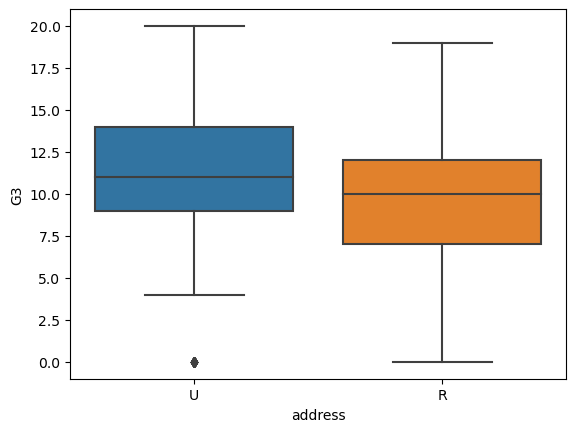

In [19]:
#create the boxplot here:

sns.boxplot(data=students, x='address', y='G3' )

plt.show()

In [20]:
## validate stats with describe()
print(students.G3.describe())
print(students.G3[students.address == 'U'].describe())
print(students.G3[students.address == 'R'].describe())

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
count    307.000000
mean      10.674267
std        4.563075
min        0.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
count    88.000000
mean      9.511364
std       4.556149
min       0.000000
25%       7.000000
50%      10.000000
75%      12.000000
max      19.000000
Name: G3, dtype: float64


In [21]:
# ASSOCIATIONS: QUANTITATIVE AND CATEGORICAL VARIABLES
# Inspecting Overlapping Histograms
# 8 min
# Another way to explore the relationship between a quantitative and categorical variable in more detail is by inspecting overlapping histograms. In the code below, setting alpha = .5 ensures that the histograms are see-through enough that we can see both of them at once. We have also used normed=True make sure that the y-axis is a density rather than a frequency (note: the newest version of matplotlib renamed this parameter density instead of normed):

# plt.hist(scores_GP , color="blue", label="GP", normed=True, alpha=0.5)
# plt.hist(scores_MS , color="red", label="MS", normed=True, alpha=0.5)
# plt.legend()
# plt.show()

# title

# By inspecting this histogram, we can clearly see that the entire distribution of scores at GP (not just the mean or median) appears slightly shifted to the right (higher) compared to the scores at MS. However, there is also still a lot of overlap between the scores, suggesting that the association is relatively weak.

# Note that there are only 46 students at MS, but there are 349 students at GP. If we hadn’t used normed = True, our histogram would have looked like this, making it impossible to compare the distributions fairly:

# title

# While overlapping histograms and side by side boxplots can convey similar information, histograms give us more detail and can be useful in spotting patterns that were not visible in a box plot (eg., a bimodal distribution). For example, the following set of box plots and overlapping histograms illustrate the same hypothetical data:

# title

# While the box plots and means/medians appear similar, the overlapping histograms illuminate the differences between these two distributions of scores.

In [22]:
# Your lists from the previous exercise (scores_urban and scores_rural) have been created for you in script.py. Use them to create an overlaid histogram of scores for students who live in urban and rural locations.

# Remember to use different colors for each histogram, set normed = True, alpha = 0.5, and use the labels 'Urban' and 'Rural', respectively.

# Based on the overlaid histogram, do you think there is an association between these two variables?

In [23]:
scores_urban = students.G3[students.address == 'U']
scores_rural = students.G3[students.address == 'R']
#print(scores_rural)

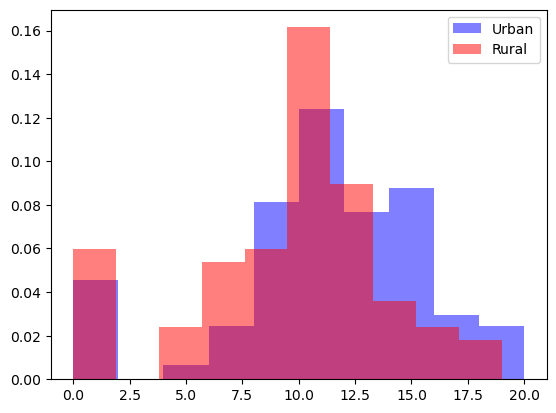

In [24]:
#students
plt.hist(scores_urban , color="blue", label="Urban", density=True, alpha=0.5)
plt.hist(scores_rural , color="red", label="Rural", density=True, alpha=0.5)
plt.legend()
plt.show()

In [25]:
# ASSOCIATIONS: QUANTITATIVE AND CATEGORICAL VARIABLES
# Exploring Non-Binary Categorical Variables
# 5 min
# In each of the previous exercises, we assessed whether there was an association between a quantitative variable (math scores) and a BINARY categorical variable (school). The categorical variable is considered binary because there are only two available options, either MS or GP. However, sometimes we are interested in an association between a quantitative variable and non-binary categorical variable. Non-binary categorical variables have more than two categories.

# When looking at an association between a quantitative variable and a non-binary categorical variable, we must examine all pair-wise differences. For example, suppose we want to know whether or not an association exists between math scores (G3) and (Mjob), a categorical variable representing the mother’s job. This variable has five possible categories: at_home, health, services, teacher, or other. There are actually 10 different comparisons that we can make. For example, we can compare scores for students whose mothers work at_home or in health; at_home or other; at home or `services; etc.. The easiest way to quickly visualize these comparisons is with side-by-side box plots:

# sns.boxplot(data = df, x = 'Mjob', y = 'G3')
# plt.show()

# title

# Visually, we need to compare each box to every other box. While most of these boxes overlap with each other, there are some pairs for which there are some apparent differences. For example, scores appear to be higher among students with mothers working in health than among students with mothers working at home or in an “other” job. If there are ANY pairwise differences, we can say that the variables are associated; however, it is more useful to specifically report which groups are different.

# Instructions
# Checkpoint 1 Enabled
# 1.
# Create a side-by-side boxplot to assess whether there is an association between students’ math score (G3) and their fathers’ job (Fjob). Do you think there is an association between these variables? For which pairs of groups do you see differences?


# Stuck? Get a hint
# Community Forums
# Still have questions? View this exercise's thread in the Codecademy Forums.

In [26]:
# 1. Create a side-by-side boxplot to assess whether there is an association between students’ math score (G3) and their fathers’ job (Fjob). Do you think there is an association between these variables? For which pairs of groups do you see differences?

<Axes: xlabel='Fjob', ylabel='G3'>

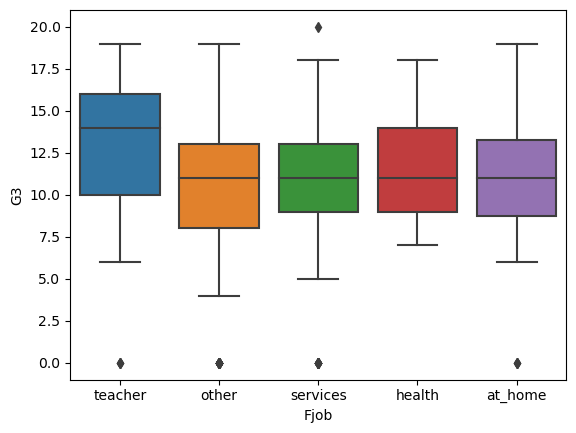

In [27]:
# students
sns.boxplot(data=students, x='Fjob', y='G3')

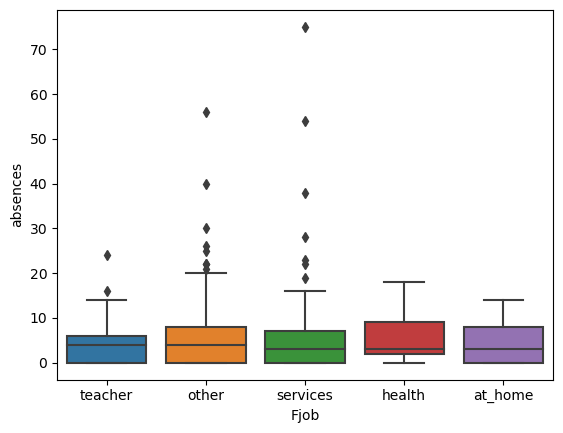

In [28]:
plt.show()
sns.boxplot(data=students, x='Fjob', y='absences')
plt.show()
plt.close()

In [29]:
plt.show()

In [30]:
# ASSOCIATIONS: QUANTITATIVE AND CATEGORICAL VARIABLES
# Review
# 4 min
# In this lesson, we used summary statistics and data visualization tools to examine an association between a quantitative and categorical variable. More specifically, we:

# evaluated mean and median differences
# inspected side-by-side box plots
# examined overlapping histograms
# looked at pair-wise comparisons for a quantitative and a non-binary categorical variable
# After calculating a mean or median difference and visually comparing distributions, the next step might be to run a hypothesis test to look for evidence of population-level differences (will a similar difference in scores be observed for ALL students who ever attend these schools?). Now that you know how to investigate whether variables are associated, you can use these techniques to explore associations on more datasets.

# Note that data in this lesson was downloaded from the UCI Machine Learning repository:

# Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [archive.ics.uci.edu/ml/index.php]. Irvine, CA: University of California, School of Information and Computer Science.

# The data was originally collected by:

# P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

# Instructions
# A new dataset named titanic has been uploaded for you in script.py. This data contains information about passengers on the Titanic, including the amount they paid for their fare and whether or not they survived (note: this is a subset of the full data available). To practice the skills learned in this lesson,
# let’s investigate whether there is an association between the fare that a passenger paid (Fare) and whether or not they survived (Survived, which is equal to 0 if the passenger died and 1 if they survived):

# Calculate the difference in mean fare paid by those who survived and those who died. Which group paid a higher average fare?
# Calculate the difference in median fare for those who survived and those who died.
# Create side-by-side box plots of fares by survival. Now that you can see the spread of the data, do the mean/median differences seem relatively small or large?
# Create overlapping histograms of fares by survival (you’ll have to delete or comment out your box plot code before you try to make a histogram). Does this provide any additional information?
# Solution code is provided for you in solution.py if you need assistance.

In [31]:
titanic = pd.read_csv('titanic.csv')

In [32]:
titanic.describe()
#titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,871.000000,871.000000,871.000000,696.000000,871.000000,871.000000,871.000000
mean,445.319173,0.376579,2.338691,29.661164,0.517796,0.366246,26.530170
std,257.761917,0.484806,0.821469,14.571894,1.101448,0.792325,29.351184
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.862500
75%,665.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


In [33]:
#print the first 10 rows of data:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
# Calculate the difference in mean fare paid by those who survived and those who died. Which group paid a higher average fare?
titanic_died = titanic.Fare[titanic.Survived == 0]
titanic_survived = titanic.Fare[titanic.Survived == 1]

In [35]:
print( titanic_died.head(), titanic_survived.head())
print( titanic_died.describe(), titanic_survived.describe())

0     7.2500
4     8.0500
5     8.4583
6    51.8625
7    21.0750
Name: Fare, dtype: float64 1    71.2833
2     7.9250
3    53.1000
8    11.1333
9    30.0708
Name: Fare, dtype: float64
count    543.000000
mean      19.720801
std       21.562705
min        0.000000
25%        7.854200
50%       10.462500
75%       26.000000
max      153.462500
Name: Fare, dtype: float64 count    328.000000
mean      37.802998
std       36.289537
min        0.000000
25%       12.215625
50%       26.000000
75%       55.110425
max      164.866700
Name: Fare, dtype: float64


In [36]:
titanic_died.count()
#titanic_survived.count()

543

In [37]:
# Calculate the difference in mean fare paid by those who survived and those who died. Which group paid a higher average fare?
# print(titanic_died.Fare.mean())
# print(titanic_survived.Fare.mean())
# print( titanic_died.Fare.mean()- titanic_survived.Fare.mean()) #diff

print(round(titanic_died.mean(),2))
print(round(titanic_survived.mean(),2))
print( round(titanic_died.mean()- titanic_survived.mean(),2)) #diff


19.72
37.8
-18.08


In [38]:
#Calculate the difference in median fare for those who survived and those who died.
# print(titanic_died.Fare.median())
# print(titanic_survived.Fare.median())
# print( titanic_died.Fare.median() - titanic_survived.Fare.median() ) #diff

print(round(titanic_died.median(),2))
print(round(titanic_survived.median(),2))
print( round(titanic_died.median()- titanic_survived.median(),2)) #diff

10.46
26.0
-15.54


<Axes: xlabel='Survived', ylabel='Fare'>

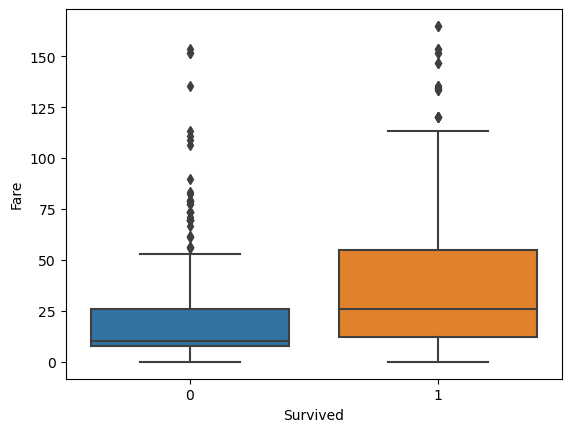

In [39]:
#Create side-by-side box plots of fares by survival. Now that you can see the spread of the data, do the mean/median differences seem relatively small or large?
sns.boxplot(data=titanic, y='Fare', x='Survived') 

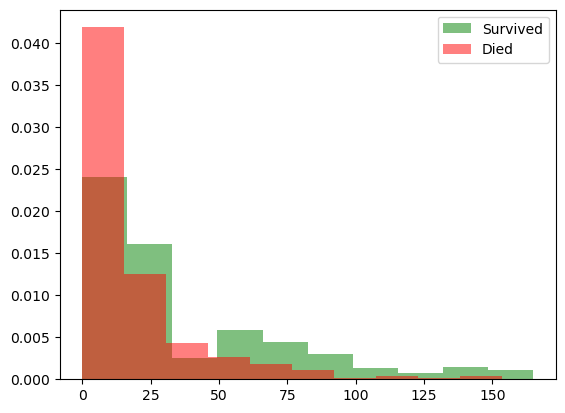

In [40]:
####
#Create overlapping histograms of fares by survival (you’ll have to delete or comment out your box plot code before you try to make a histogram). Does this provide any additional information?
###

#plt.hist(scores_urban , color="blue", label="Urban", density=True, alpha=0.5)
plt.hist(titanic_survived , color="green", label="Survived", density=True, alpha=0.5)
plt.hist(titanic_died , color="red", label="Died", density=True, alpha=0.5)

#print(titanic_survived)
#plt.hist(titanic_survived.Fare , color="green", label="Survived", density=True, alpha=0.5)
#plt.hist(titanic_survived.Fare , color="green", density=True, alpha=0.5)
#plt.hist(titanic_survived.Fare , color="green", density=True, alpha=.25)
#plt.close()
#plt.hist(titanic_died.Fare , color="red", label="Died", density=True, alpha=0.5)
#plt.hist(titanic_died.Fare , color="red",  density=True, alpha=0.5)
plt.legend()
plt.show()


In [41]:
# ASSOCIATIONS: TWO QUANTITATIVE VARIABLES
# Introduction
# 3 min
# When associations exist between variables, it means that information about the value of one variable gives us information about the value of the other variable. In this lesson, we will cover ways of examining an association between two quantitative variables.

# Throughout the next few exercises, we’ll examine some data about Texas housing rentals on Craigslist — an online classifieds site. The data dictionary is as follows:

# price: monthly rental price in U.S.D.
# type: type of housing (eg., 'apartment', 'house', 'condo', etc.)
# sqfeet: housing area, in square feet
# beds: number of beds
# baths: number of baths
# lat: latitude
# long: longitude
# Except for type, all of these variables are quantitative. Which pairs of variables do you think might be associated? For example, does knowing something about price give you any information about square footage?

In [42]:
housing = pd.read_csv('housing_sample.csv')

In [43]:
#Use the .head() method to print the first 10 rows and inspect some more of the data. What are some other quantitative variables that might be related to each other?
housing.head()

,price,type,sqfeet,beds,baths,lat,long
0,615,apartment,364,0,1.0,35.1653,-101.8840
1,1346,apartment,816,1,1.0,32.9865,-96.6860
2,900,apartment,500,1,1.0,30.2355,-97.7292
3,650,apartment,700,1,1.0,26.1923,-98.2657
4,1330,apartment,1040,2,2.0,30.6380,-96.2940


In [44]:
# ASSOCIATIONS: TWO QUANTITATIVE VARIABLES
# Scatter Plots
# 5 min
# One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot. This makes it easy to look for patterns or trends in the data. Let’s start by plotting the area of a rental against its monthly price to see if we can spot any patterns.

# plt.scatter(x = housing.price, y = housing.sqfeet)
# plt.xlabel('Rental Price (USD)')
# plt.ylabel('Area (Square Feet)')
# plt.show()

# This image shows a scatter plot with price on the x-axis and area on the y-axis. There is a clear linear relationship; rentals that cost more tend to have larger area.

# While there’s a lot of variation in the data, it seems like more expensive housing tends to come with slightly more space. This suggests an association between these two variables.

# It’s important to note that different kinds of associations can lead to different patterns in a scatter plot. For example, the following plot shows the relationship between the age of a child in months and their weight in pounds. We can see that older children tend to weigh more but that the growth rate starts leveling off after 36 months:

# Plot showing the relationship between the age of a child in months and their weight in pounds. We can see that older children tend to weigh more but that the growth rate starts leveling off after 36 months

# If we don’t see any patterns in a scatter plot, we can probably guess that the variables are not associated. For example, a scatter plot like this would suggest no association:

# Scatter plot with no apparent pattern; the points appear randomly distributed.

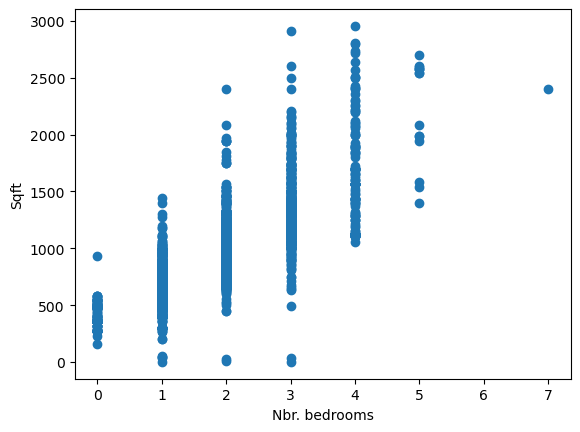

In [45]:
# The housing data has been saved for you as a dataframe named housing in script.py. Create a scatter plot to see if there is an association between the number of bedrooms (beds) and the area (sqfeet) of a rental. 
# Use Number of Bedrooms for the x-axis of your scatter plot. Do you think these variables are associated? If so, is the relationship what you expected?

plt.scatter(x = housing.beds, y = housing.sqfeet)
#plt.legend()
plt.xlabel( "Nbr. bedrooms" )
plt.ylabel( "Sqft" )
plt.show()


In [46]:
# ASSOCIATIONS: TWO QUANTITATIVE VARIABLES
# Exploring Covariance
# 7 min
# Beyond visualizing relationships, we can also use summary statistics to quantify the strength of certain associations. Covariance is a summary statistic that describes the strength of a linear relationship. A linear relationship is one where a straight line would best describe the pattern of points in a scatter plot.

# Covariance can range from negative infinity to positive infinity. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other. A negative covariance indicates a larger value of one variable is associated with a smaller value of the other. A covariance of 0 indicates no linear relationship. Here are some examples:

# This figure shows three different plots. In the first, the points are almost exactly along a line with a positive slope and the label is "large positive covariance". In the middle plot, the points are randomly scattered and the label is "covariance of zero". In the last plot, the points are almost exactly on a negatively sloping line and the label is "large negative covariance"

# To calculate covariance, we can use the cov() function from NumPy, which produces a covariance matrix for two or more variables. A covariance matrix for two variables looks something like this:

# variable 1	variable 2
# variable 1	variance(variable 1)	covariance
# variable 2	covariance	variance(variable 2)
# In python, we can calculate this matrix as follows:

# cov_mat_price_sqfeet = np.cov(housing.price, housing.sqfeet)
# print(cov_mat_price_sqfeet)
# #output: 
# [[184332.9  57336.2]
#  [ 57336.2 122045.2]]

# Notice that the covariance appears twice in this matrix and is equal to 57336.2.

In [47]:
# Use the cov() function from NumPy to calculate the covariance matrix for the sqfeet variable and the beds variable. Save the covariance matrix as cov_mat_sqfeet_beds

In [48]:
# calculate and print covariance matrix:

#np.cov(housing.sqfeet, housing.beds)
cov_mat_sqfeet_beds =  np.cov(housing.sqfeet, housing.beds)

In [49]:
cov_mat_sqfeet_beds

array([[1.10668978e+05, 2.28223306e+02],
       [2.28223306e+02, 7.24471949e-01]])

In [50]:
#Look at the covariance matrix you just printed and find the covariance of sqfeet and beds. Save that number as a variable named cov_sqfeet_beds.

In [51]:

#len(cov_mat_sqfeet_beds)
#print(cov_mat_sqfeet_beds[0][1])
cov_sqfeet_beds = cov_mat_sqfeet_beds[0][1]

In [52]:
cov_sqfeet_beds

228.2233061940595

In [53]:
# ASSOCIATIONS: TWO QUANTITATIVE VARIABLES
# Correlation- Part 1
# 8 min
# Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

# Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

# This figure shows 5 different plots. From left to right, the plots show a correlation of 1, a large positive correlation, no correlation, a large negative correlation, and a correlation of -1.)

# The pearsonr() function from scipy.stats can be used to calculate correlation as follows:

# from scipy.stats import pearsonr
# corr_price_sqfeet, p = pearsonr(housing.price, housing.sqfeet)
# print(corr_price_sqfeet) #output: 0.507

# Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.

In [54]:
from scipy.stats import pearsonr

In [55]:
#Use the pearsonr function from scipy.stats to calculate the correlation between sqfeet and beds. Store the result in a variable named corr_sqfeet_beds and print out the result. How strong is the linear association between these variables?

In [56]:
# calculate corr_sqfeet_beds and print it out:
print(pearsonr(housing.beds, housing.sqfeet))
print(pearsonr(housing.sqfeet, housing.beds)) # same result in either order ( at least in this case )

corr_sqfeet_beds, p = pearsonr(housing.sqfeet, housing.beds)

print(corr_sqfeet_beds, p)

PearsonRResult(statistic=0.8060022524416222, pvalue=0.0)
PearsonRResult(statistic=0.8060022524416222, pvalue=0.0)
0.8060022524416222 0.0


In [57]:
#Generate a scatter plot of beds and sqfeet again. Does the correlation value make sense?

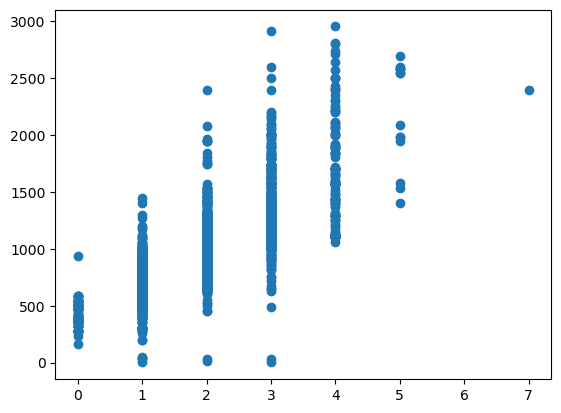

In [58]:
plt.scatter(x = housing.beds, y = housing.sqfeet)

In [59]:
# ASSOCIATIONS: TWO QUANTITATIVE VARIABLES
# Correlation Part 2
# 6 min
# It’s important to note that there are some limitations to using correlation or covariance as a way of assessing whether there is an association between two variables. Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

# For example, the four scatter plots below all show pairs of variables with near-zero correlations. The bottom left image shows an example of a perfect linear association where the slope is zero (the line is horizontal). Meanwhile, the other three plots show non-linear relationships — if we drew a line through any of these sets of points, that line would need to be curved, not straight!

# This figure shows four different scatter plots where the correlation is equal to zero in every case. The bottom left image shows an example of a perfect linear association where the slope is zero (the line is horizontal). Meanwhile, the other three plots show non-linear relationships, where the points follow a curved pattern.

In [60]:
# 1.
# A simulated dataset named sleep has been loaded for you in script.py. The hypothetical data contains two columns:

# hours_sleep: the number of hours that a person slept
# performance: that person’s performance score on a physical task the next day
# Create a scatter plot of hours_sleep (on the x-axis) and performance (on the y-axis). What is the relationship between these variables?

In [61]:
sleep = pd.read_csv('sleep_performance.csv')
#sleep.head()

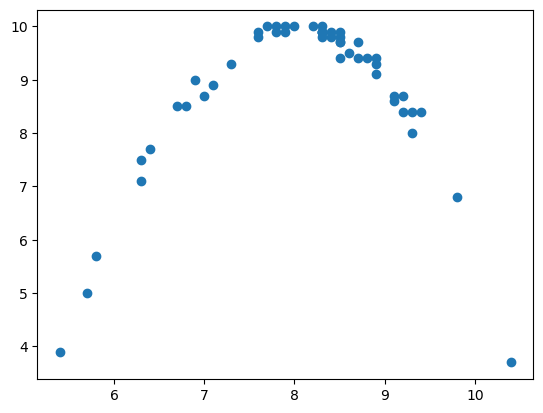

In [62]:
plt.scatter(x = sleep.hours_sleep, y = sleep.performance)
#plt.scatter(sleep, x = hours_sleep, y = performance)  ## doesnt work
plt.show()

In [63]:
# Calculate the correlation for hours_sleep and performance and save the result as corr_sleep_performance. Then, print out corr_sleep_performance. Does the correlation accurately reflect the strength of the relationship between these variables?

In [64]:
corr_sleep_performance, p  = pearsonr(sleep.hours_sleep, sleep.performance)

In [65]:
corr_sleep_performance

0.2814978189049413

In [66]:
# ASSOCIATIONS: TWO QUANTITATIVE VARIABLES
# Review
# 5 min
# In this lesson we discussed several ways of examining an association between two quantitative variables. More specifically, we:

# Used scatter plots to examine relationships between quantitative variables
# Used covariance and correlation to quantify the strength of a linear relationship between two quantitative variables
# Note that the dataset used in this lesson was downloaded from kaggle.

# Instructions
# As a final exercise, a new dataset named penguins has been uploaded for you in script.py. This dataset contains various measurements for a sample of penguins. To practice the skills learned in this lesson, here are some things to try:

# Inspect the first few rows of data.
# Create a scatter plot of flipper length (flipper_length_mm) and body mass (body_mass_g).
# Inspect your plot. What is the relationship between these variables?
# Calculate the covariance for these two variables.
# Calculate the correlation for these two variables. Does this number make sense given the plot you created?
# Solution code is available to you in solution.py if you want to compare your work.



In [ ]:
# As a final exercise, a new dataset named penguins has been uploaded for you in script.py. This dataset contains various measurements for a sample of penguins. To practice the skills learned in this lesson, here are some things to try:

# Inspect the first few rows of data.
# Create a scatter plot of flipper length (flipper_length_mm) and body mass (body_mass_g).
# Inspect your plot. What is the relationship between these variables?
# Calculate the covariance for these two variables.
# Calculate the correlation for these two variables. Does this number make sense given the plot you created?
# Solution code is available to you in solution.py if you want to compare your work.

In [67]:
penguins = pd.read_csv('penguins.csv')

In [68]:
# Inspect the first few rows of data.

penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
3,Adelie,36.7,19.3,193.0,3450.0,female
4,Adelie,39.3,20.6,190.0,3650.0,male


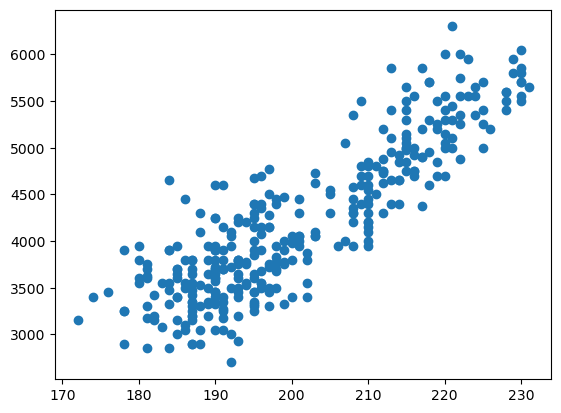

In [69]:
# Create a scatter plot of flipper length (flipper_length_mm) and body mass (body_mass_g).
# Inspect your plot. What is the relationship between these variables?

plt.scatter(x = penguins.flipper_length_mm, y = penguins.body_mass_g) # apparent positive covariance

In [70]:
# Calculate the covariance for these two variables.

np.cov(penguins.flipper_length_mm, penguins.body_mass_g)

array([[1.96441677e+02, 9.85219165e+03],
       [9.85219165e+03, 6.48372488e+05]])